# ‘Hacking’ Data Analytics with SQL & Python


---

## 1.Introduction

<font size="3">Thanks for being here!</font>

(all you need to participate is a valid gmail adress)

In order to be able to edit the notebook you have to download it and then open in a new tab

1. Download the notebook locally: File--> Download --> Download .ipynb
1. Import the downloaded notebook in this tab: File --> Import notebook --> Select the local notebook
1. Select cell Q1 from index
1. Click **Runtime** in the toolbar and then --> **Run before**

**About me**

- Started my professional journey in the field when I joined Cardlink in Jan 19’ with the role of **Data Scientist**.

- Joined Skroutz in April 21’ with the role of **Business Intelligence Analyst** and then as **Business Intelligence Lead** helped people make effective and quick decisions with data.

- Currently as **Senior Data Analyst** at Hack The Box, helping to establish a data culture and supporting decisions for the platform.

[Linkedin](https://www.linkedin.com/in/antonios-angelakis-249899101/)
[Github](https://github.com/angeanto)
[Website](https://angeanto.github.io/)
[Tableau Public](https://public.tableau.com/app/profile/antonis1649/vizzes)

### 1.1 Why

The specific notebook is an attempt to cover some basic data analytics concepts with **SQL** and **Python**. Some of these are general and concern the *strategy of writing code*, while others are *specific concepts* that often arise in analytics tasks and may conceal certain peculiarities. All of these, have arisen from everyday tasks, and their solutions are easily applicable.

### 1.2 What


1. SQL
  1. Code with **CTEs** (Common Table Expressions)
  1. Enhance reporting strategy with **Reporting Period - Reporting Date** concept
  1. Hierarchical data and queries with **Recursive** CTE
  1. `lag` & `lead` window functions
  1. Common rows and rows in table A but not in table B with `except` & `intersect` clauses

1. Python

  1. Match nearest key with pandas `merge_asof()` function
  1. Create any function and iterate in dataframe using `apply()`
  1. Get previous **end of month** column value with `Grouper()`, `last()`, `transform()`, and `shift()`.
  1. Carry the last value per entity and month until today's end of month. with `resample()` & `ffill()`
  1. Code by importing modules and functions in a notebook

### 1.3 How



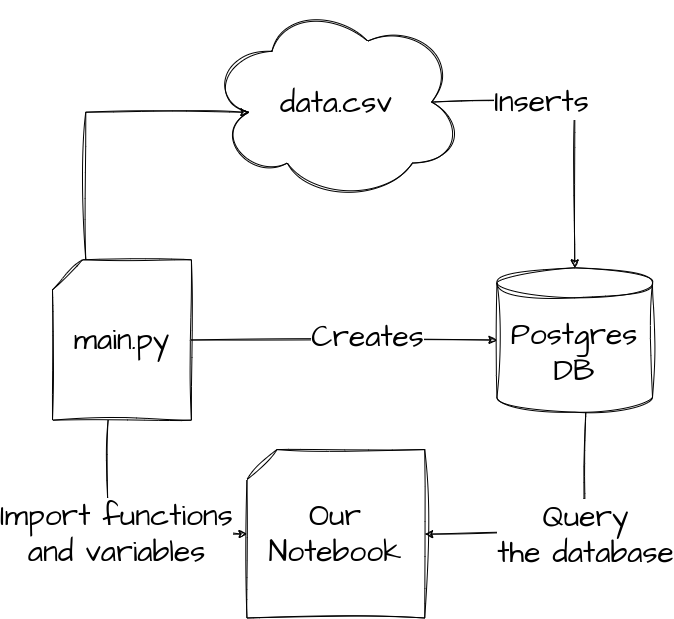

### 1.4 Database Schema

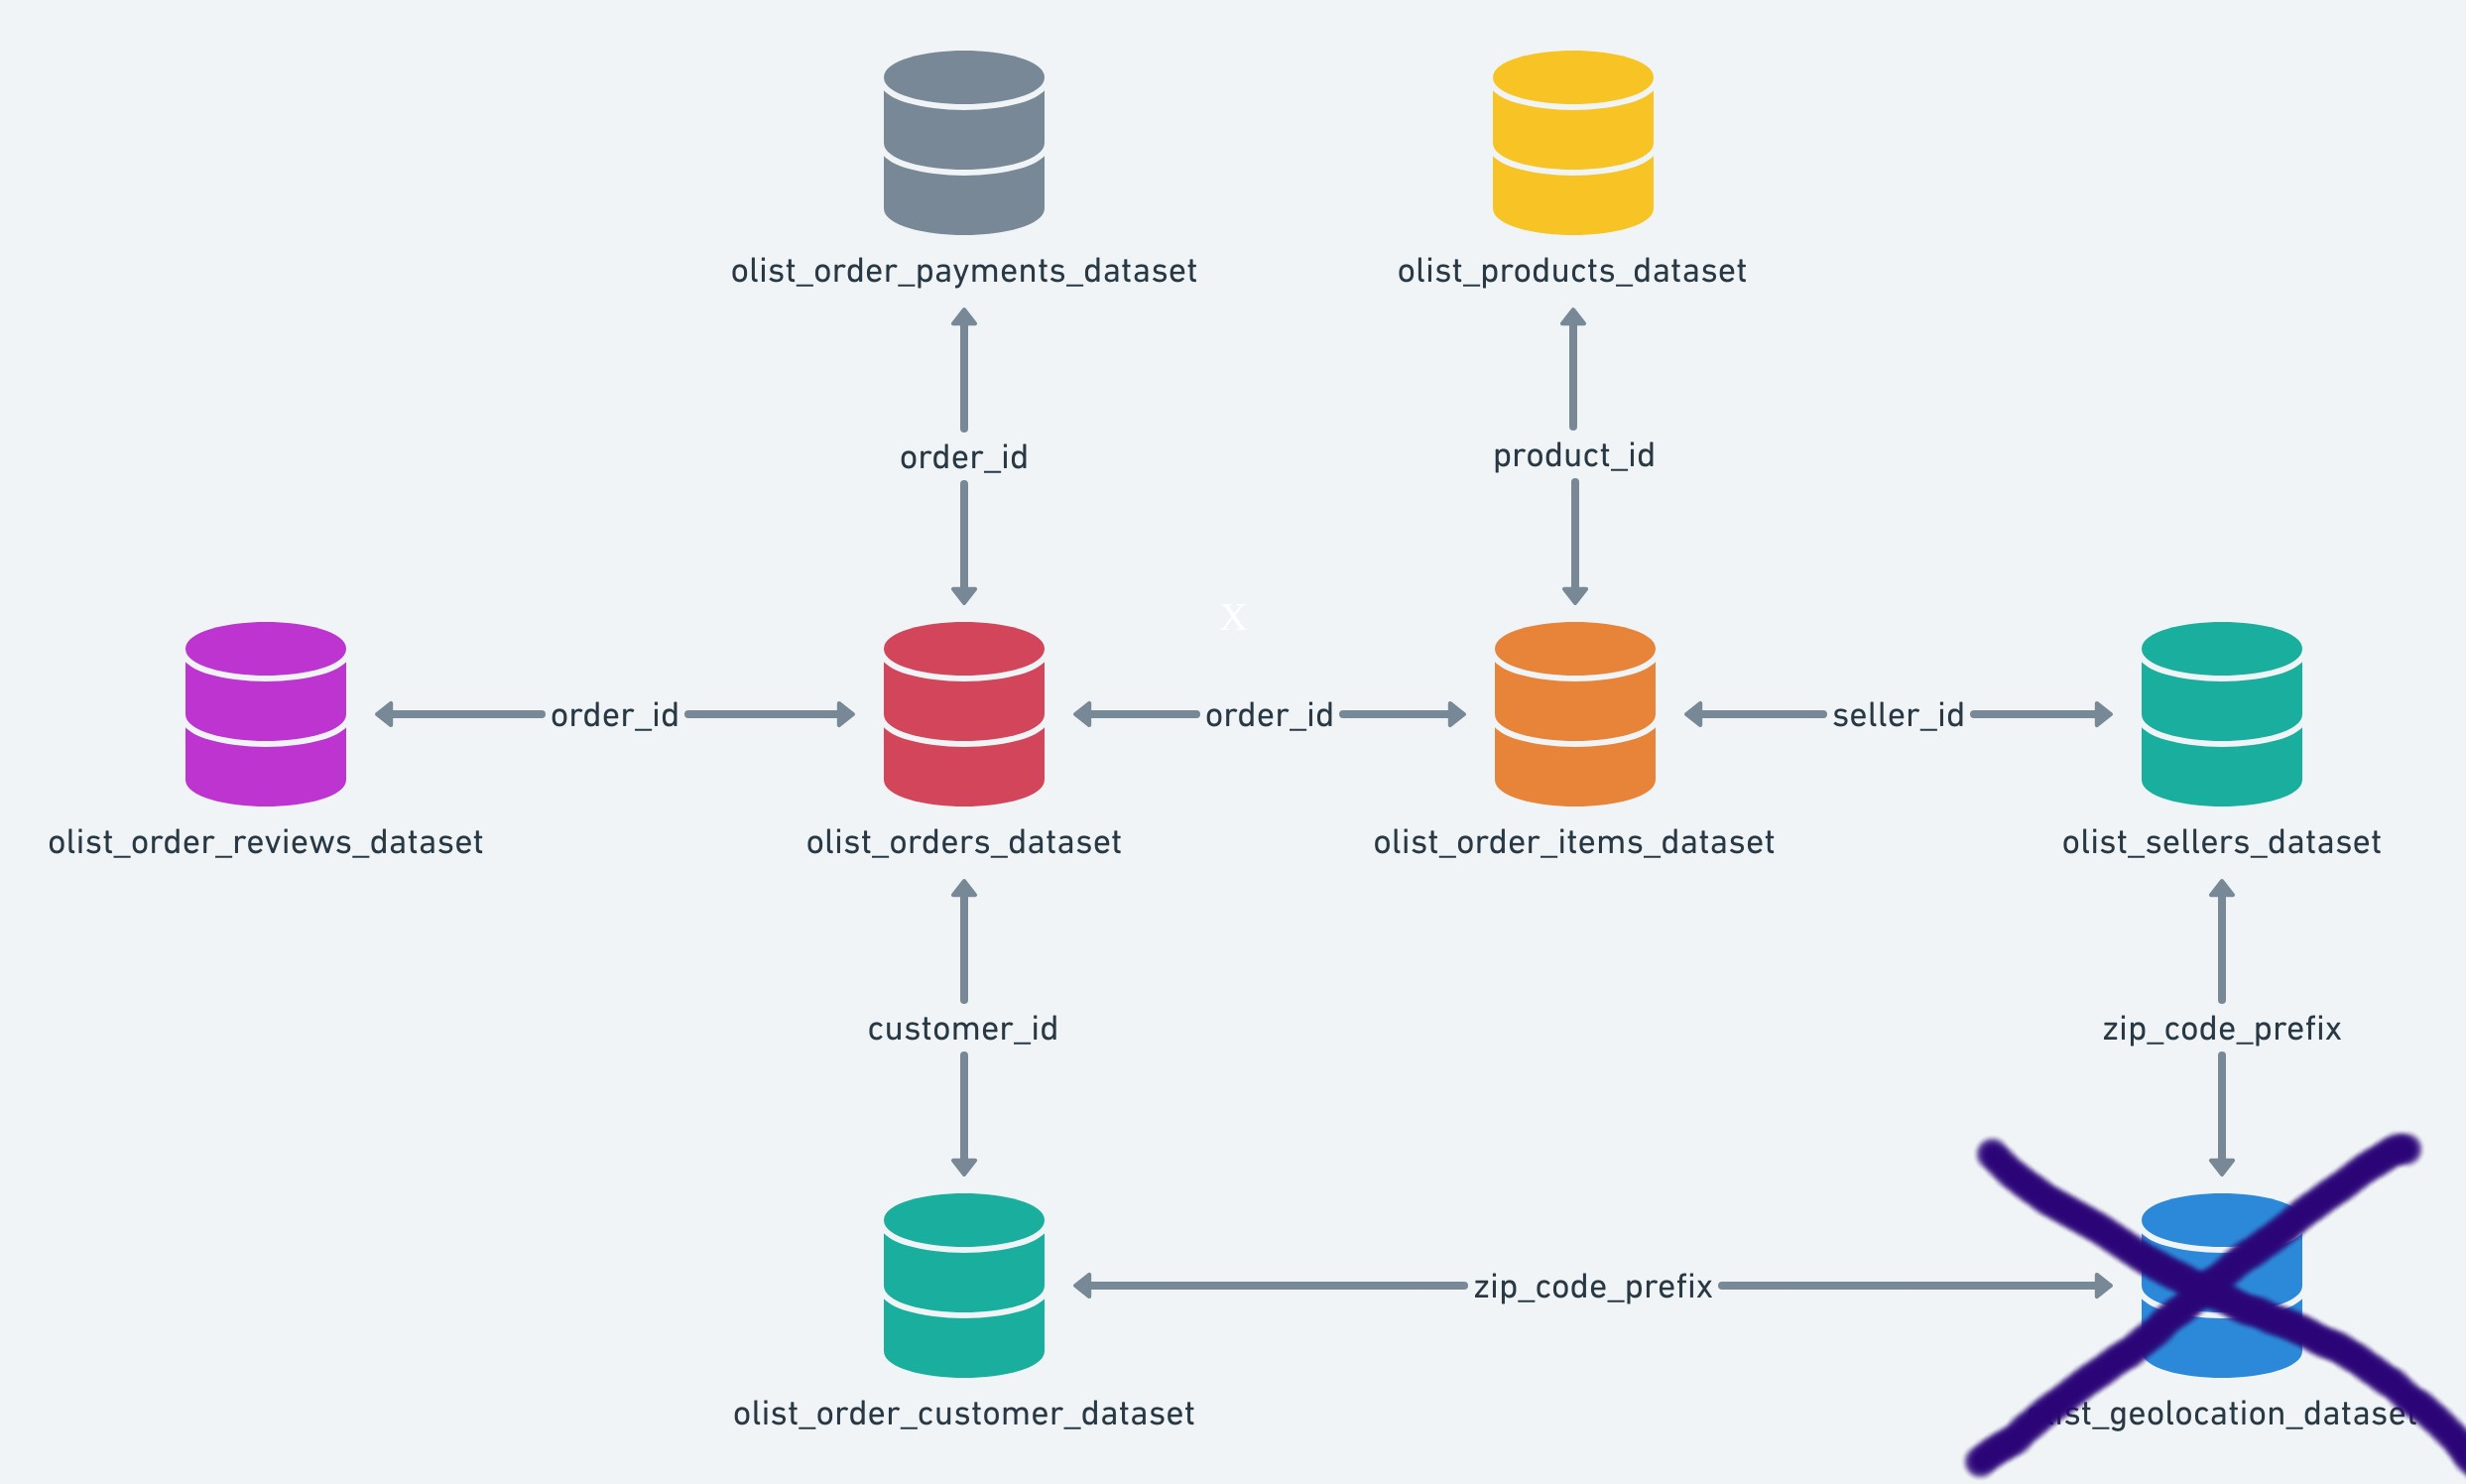

## 2.Configuration

### 2.1 Clone github repo with all necessary worskhop files

In [ ]:
# !rm -rf ai_and_beers_hacking_data_and_analytics

# Clone the GitHub repository
!git clone https://github.com/angeanto/ai_and_beers_hacking_data_and_analytics.git

fatal: destination path 'ai_and_beers_hacking_data_and_analytics' already exists and is not an empty directory.


### 2.2 `import * from main.py`

In [ ]:
from ai_and_beers_hacking_data_and_analytics.main import *

**Dataframe name --> table name**
- o_list_order_customer --> 'customers'
- o_list_order_items --> 'order_items'
- o_list_order_payments --> 'order_payments'
- o_list_order_reviews --> 'order_reviews'
- o_list_orders --> 'orders'
- o_list_products --> 'products'
- o_list_sellers --> 'sellers'

In [ ]:
o_list_order_customer.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [ ]:
o_list_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_bin
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,[20-100]


In [ ]:
o_list_order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [ ]:
o_list_order_reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59


In [ ]:
o_list_orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33


In [ ]:
o_list_products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [ ]:
o_list_sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


## 3.SQL Concepts

### 3.1 Code with CTEs (Common Table Expressions)
- **Readability and Maintainability** </br>
Breaking down complex queries into smaller, results in more manageable and readable parts. This can greatly improve the clarity and maintainability of SQL code.

- **Code Reusability** </br>
Results can be referenced multiple times within a single query.

- **Easier Debugging and Testing** </br>
It becomes simpler to isolate and debug specific parts of a query.

- **Code Documentation**</br>
Properly named CTEs can serve as self-documenting code, providing descriptive names for temporary result sets and making the intention of the query clearer.

<font size="6">Case</font> </br>
We'll compare the same query using nested queries VS CTEs

 Fact: Any highly skilled analytics team or professional environment codes with CTEs and/or temp tables instead of huge unreadable nested queries.

In [ ]:
# NESTED

# We'll create a query which ranks seller cities per customer city based on sales along with the avg price,
# filtered for prices >30.
# We'll then filter out the top 3rd seller city for customer_city = 'cabo frio'.

challenge_1_nested_query = """
select *
from
(
  select
    aggregated_data.customer_city
    , aggregated_data.seller_city
    , avg_price_total
    , dense_rank() over (partition by customer_city order by sales desc) as rank_of_seller
  from
  (
    select
      customers.customer_city
      , sellers.seller_city
      , avg(price) as avg_price_total
      , count(*) as sales
    from order_items
    left join (select seller_id, seller_city from sellers) sellers
    on order_items.seller_id = sellers.seller_id
    left join (select order_id, customer_id from orders where order_status = 'delivered') orders
    on order_items.order_id = orders.order_id
    left join (select customer_id, customer_city from customers) customers
    on orders.customer_id = customers.customer_id
    where price > 30
    group by 1,2
  ) aggregated_data
) rank_data
cross join (select avg(price) as avg_price_total from order_items where price > 30) avg_price_for_order_items
where customer_city = 'cabo frio' and rank_of_seller = 3
"""

# Execute SQL queries and store results in DataFrames
challenge_1_nested = execute_sql_query(challenge_1_nested_query)
challenge_1_nested

,customer_city,seller_city,avg_price_total,rank_of_seller,avg_price_total
0,cabo frio,curitiba,132.448333,3,142.443342


In [ ]:
test_query = """ select * from orders limit 5 """
test = execute_sql_query(test_query)
test

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# CTEs

# We'll create a query which ranks seller cities per customer city based on sales along with the avg price,
# filtered for prices >30.
# We'll then filter out the top 3rd seller city for customer_city = 'cabo frio'.

challenge_1_cte_query = """
with sellers_cte as (
  select
    seller_id
    , seller_city
  from sellers
)

, order_items_cte as (
  select
    order_id
    , order_item_id
    , seller_id
    , price
  from order_items
  where price > 30
)

, avg_price_for_order_items_cte as (
  select
    avg(price) as avg_price_total
  from order_items_cte
)

, orders_cte as (
  select
    order_id
    , customer_id
  from orders
  where order_status = 'delivered'
)

, customers_cte as (
  select
    customer_id
    , customer_city
  from customers
)

, aggregated_data as (
  select
    customers_cte.customer_city
    , sellers_cte.seller_city
    , count(*) as sales
    , avg(order_items_cte.price) as avg_price_per_city_combo
  from order_items_cte
  left join sellers_cte
  on order_items_cte.seller_id = sellers_cte.seller_id
  left join orders_cte
  on order_items_cte.order_id = orders_cte.order_id
  left join customers_cte
  on orders_cte.customer_id = customers_cte.customer_id
  group by 1,2
)

, rank_cte as (
  select
    aggregated_data.customer_city
    , aggregated_data.seller_city
    , avg_price_per_city_combo
    , dense_rank() over (partition by customer_city order by sales desc) as rank_of_seller
  from aggregated_data
)

select *
from rank_cte
cross join avg_price_for_order_items_cte
where customer_city = 'cabo frio' and rank_of_seller = 3
"""

# Execute SQL queries and store results in DataFrames
challenge_1_cte = execute_sql_query(challenge_1_cte_query)
challenge_1_cte

# Which one is more readable and easy to edit?

,customer_city,seller_city,avg_price_per_city_combo,rank_of_seller,avg_price_total
0,cabo frio,curitiba,132.448333,3,142.443342


### 3.2 Enhance reporting strategy with **Reporting Period - Reporting Date** concept

<font size="6">Case</font> </br>
We'll create a `reporting_periods_table` and use it for reporting purposes. This table can be used in other SQL queries, dashboards etc across all our reporting. </br>
This table can be enhanced with any relevant date column such as `end_of_month`, `holiday_period` etc.</br>
Fact: Used in production environment, kudos to HTB Analytics team 👏

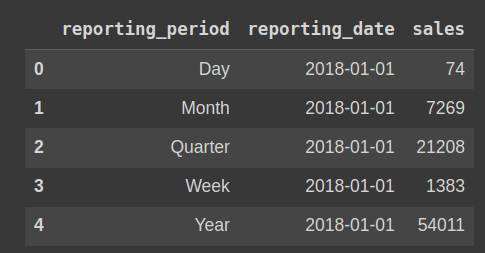

**Aggregated Reporting and Analysis**</br>
  - Enables reporting and analysis at different levels of detail, from yearly summaries to daily insights.
  - Provides flexibility in analyzing data based on business requirements.

**Consolidation and Ease of Querying** </br>
  - Querying becomes more straightforward. Analysts can easily retrieve aggregated information without the need for complex joins or extensive transformations, simplifying the reporting process.

**Efficient Data Retrieval** </br>
  - Streamlines the process of fetching specific periods or ranges, enhancing query performance and reducing processing time.

**Consistent and Standardized Data**</br>
  - Promotes data consistency by structuring information uniformly across different time frames.

**Simplified Maintenance and Updates** </br>
  - Adding new data or updating existing records while preserving consistency across various time frames becomes more manageable.


**Improved Data Visualization and Interpretation**</br>
  - Having data organized based on reporting periods in the SQL side aids in effective data visualization, avoiding the creation of parameteres and bi tool calculated fields.

**Scalability and Adaptability** </br>
  - As reporting evolves, this table offers scalability and adaptability. It can accommodate new tables, additional granularities, or modified reporting requirements without significant structural changes.

#### 3.2.1 Create table `all_dates` to store the raw dates

In [ ]:
# SQL queries
drop_table_all_dates_query = """
    drop table if exists all_dates
"""

create_table_all_dates_query = """
create table if not exists all_dates (
date_column DATE
)
"""

insert_into_all_dates_query = """
insert into all_dates (date_column)
select generate_series('2015-01-01'::date, '2024-12-31'::date, '1 day'::interval) AS date_column
"""

# Execute commands

try:
    # Step 1: Drop table if exists
    cur.execute(drop_table_all_dates_query)

    # Step 2: Create a table to store the dates
    cur.execute(create_table_all_dates_query)

    # Step 3: Insert all dates from the first day of 2015 up to the last day of 2024
    cur.execute(insert_into_all_dates_query)

    # Commit the changes to the database
    conn.commit()
    print("Created table 'all_dates' and inserted data successfully.")

except psycopg2.Error as e:
    conn.rollback()
    print("Error:", e)

Created table 'all_dates' and inserted data successfully.


In [ ]:
all_dates_query = """ select * from all_dates"""
all_dates = execute_sql_query(all_dates_query)
all_dates.head()

,date_column
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


#### 3.2.2 Create the table `reporting_periods_table`

In [ ]:
# SQL queries
drop_table_reporting_periods_table_query = """
    drop table if exists reporting_periods_table
"""

create_table_reporting_periods_table_query = """
    create table if not exists reporting_periods_table (
    reporting_period text,
    reporting_date date,
    is_end_of_month boolean
    )
 """

insert_into_reporting_periods_table_query = """
    insert into reporting_periods_table (reporting_period, reporting_date, is_end_of_month)
    with processed_dates as (
        select
          'Day' as reporting_period
          , date(date_trunc('day',date_column)) reporting_date
          , (extract(day from (date_trunc('day', date_column) + interval '1 day')) = 1) AS is_end_of_month
        from all_dates
        union
        select
          'Week' as reporting_period
          , date(date_trunc('Week',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
        union
        select
          'Month' as reporting_period
          , date(date_trunc('Month',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
        union
        select
          'Quarter' as reporting_period
          , date(date_trunc('Quarter',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
        union
        select
          'Year' as reporting_period
          , date(date_trunc('Year',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
    )
    select *
    from processed_dates
    where reporting_date <= current_date
"""

# Execute commands

try:
    # Step 1: Drop table if exists
    cur.execute(drop_table_reporting_periods_table_query)

    # Step 2: Create a table if it doesn't exist
    cur.execute(create_table_reporting_periods_table_query)

    # Step 3: Execute the SQL query to insert data into the table
    cur.execute(insert_into_reporting_periods_table_query)

    # Commit the changes to the database
    conn.commit()
    print("Created table 'reporting_periods_table' and inserted data successfully.")

except psycopg2.Error as e:
    conn.rollback()
    print("Error:", e)

Created table 'reporting_periods_table' and inserted data successfully.


In [ ]:
reporting_periods_table_query = """ select * from reporting_periods_table"""
reporting_periods_table = execute_sql_query(reporting_periods_table_query)
reporting_periods_table

,reporting_period,reporting_date,is_end_of_month
0,Day,2016-10-25,False
1,Day,2016-05-06,False
2,Month,2021-07-01,None
3,Day,2017-08-27,False
4,Day,2015-09-04,False
...,...,...,...
3868,Day,2017-09-26,False
3869,Day,2021-08-21,False
3870,Day,2022-12-31,True
3871,Day,2022-06-25,False


#### 3.2.3 Calculate orders per period

In [ ]:
# We'll now demonstrate the usage of this table, calculating sales per reporting_period and reporting_date.

orders_per_period_query= """
with reporting_periods_table_cte as (
  select *
  from reporting_periods_table
)

, orders_cte as (
  select
    order_id
    , order_purchase_timestamp
    , 'Day' as reporting_period
    , date_trunc('day',date(orders.order_purchase_timestamp)) as order_date
  from orders
  union
  select
      order_id
    , order_purchase_timestamp
    , 'Week' as reporting_period
    , date_trunc('week',date(orders.order_purchase_timestamp)) as order_date
  from orders
  union
  select
      order_id
    , order_purchase_timestamp
    , 'Month' as reporting_period
    , date_trunc('month',date(orders.order_purchase_timestamp)) as order_date
  from orders
  union
  select
      order_id
    , order_purchase_timestamp
    , 'Quarter' as reporting_period
    , date_trunc('quarter',date(orders.order_purchase_timestamp)) as order_date
  from orders
  union
  select
      order_id
    , order_purchase_timestamp
    , 'Year' as reporting_period
    , date_trunc('year',date(orders.order_purchase_timestamp)) as order_date
  from orders
)

select
  reporting_periods_table_cte.reporting_period
  , reporting_date
  , coalesce(count(distinct(order_id)),0) as sales
from reporting_periods_table_cte
left join orders_cte
on reporting_periods_table_cte.reporting_date = orders_cte.order_date
and reporting_periods_table_cte.reporting_period = orders_cte.reporting_period
where reporting_date = '2018-01-01'
group by 1,2
"""
orders_per_period= execute_sql_query(orders_per_period_query)
orders_per_period

,reporting_period,reporting_date,sales
0,Day,2018-01-01,74
1,Month,2018-01-01,7269
2,Quarter,2018-01-01,21208
3,Week,2018-01-01,1383
4,Year,2018-01-01,54011


### 3.3 Hierarchical data and queries with Recursive CTE

```
WITH RECURSIVE cte_name AS (
   cte_query_definition

   UNION ALL

   cte_query_definition
   )

SELECT *
FROM cte_name
```

<font size="6">Case</font> </br>
We just received a new request from our stakeholders, to visualize in a Dashboard the full hierarchy path per employee. The table `employees `contains only the `manager_id` per `employee_id`.

Fact: It's considered as an advanced SQL concept. Used frequently in different scenarios per business such as:
  1. Obtaining the sequence of product's categories that belongs to a final category and we need to create KPI tables for all parent categories.
  1. Obtaining the path of different devices (serial numbers) per terminal id, because of replacements.


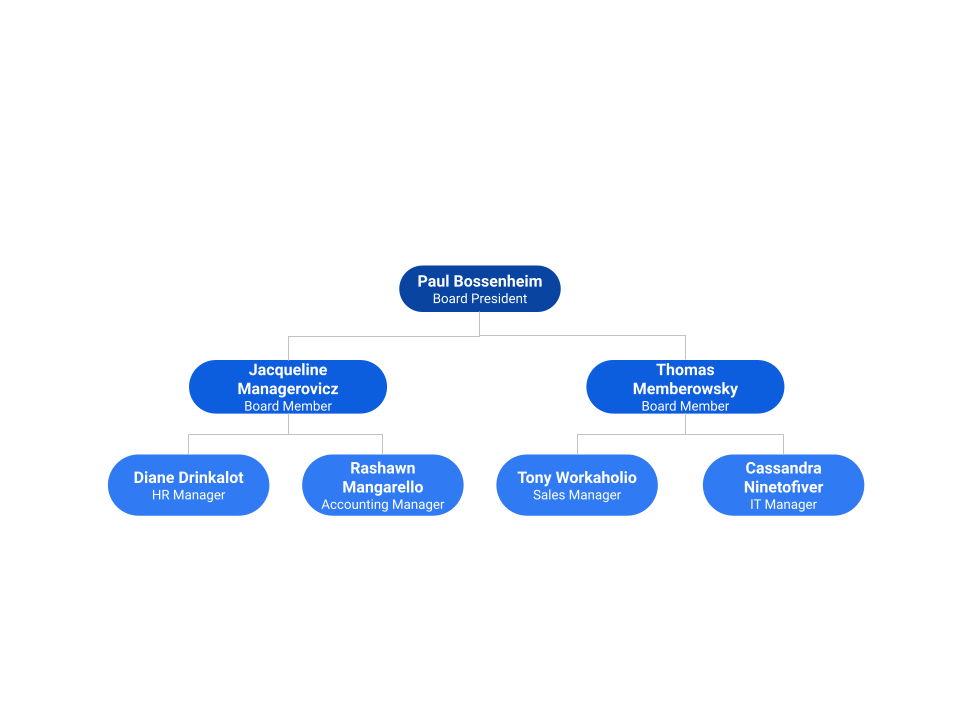

**Dataframe name --> table name**
- employees --> 'employees'

In [ ]:
# Explore the table
employees.head(1)

,employee_id,first_name,last_name,email,phone,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-JUN-07,SH_CLERK,2600,-,124.0,50


**Anchor** </br>

The **anchor** member of the CTE is the first SELECT statement. By doing this, you select the root of the hierarchy. The WHERE clause means this will be done only for the rows where the value in the column `manager_id is null`.

**Recursive** </br>
The **recursive** member is the second `select` statement. It takes the value (which is 'CEO') and finds all employees who have the CEO as manager. The recursive iteration continues and then finds all employees who have these managers as manager. It will stop when the employee_id is not found as `manager_id`. Recursive terminates when the result set `is null`.

**Connect results(sets)**
The next step is to “connect” the anchor member with the recursive member of the CTE with `union all`. All these recursive results are beeing converted in a single result with `union all`.The recursive member serves as an extension of the anchor member. This means it extends a result that’s already been found (by the anchor member) with new results. Thus, the recursive member will perform everything described until it reaches the last employee.

In [ ]:
# Create the path column which stores the full hierarchical path per employee
employees_recursive_query = """
with recursive employee_hierarchy AS (
  SELECT
    employee_id
    , first_name
    , last_name
    , manager_id
    , 'CEO' AS path
  from employees
  where manager_id is null

  union all

  select
    e.employee_id
    , e.first_name
    , e.last_name
    , e.manager_id
    , employee_hierarchy.path || '->' || e.last_name
  from employees e, employee_hierarchy
  where e.manager_id = employee_hierarchy.employee_id
)

select *
from employee_hierarchy
"""
employees_recursive = execute_sql_query(employees_recursive_query)
employees_recursive

,employee_id,first_name,last_name,manager_id,path
0,100,Steven,King,NaN,CEO
1,201,Michael,Hartstein,100.0,CEO->Hartstein
2,101,Neena,Kochhar,100.0,CEO->Kochhar
3,102,Lex,De Haan,100.0,CEO->De Haan
4,114,Den,Raphaely,100.0,CEO->Raphaely
5,120,Matthew,Weiss,100.0,CEO->Weiss
6,121,Adam,Fripp,100.0,CEO->Fripp
7,122,Payam,Kaufling,100.0,CEO->Kaufling
8,123,Shanta,Vollman,100.0,CEO->Vollman
9,124,Kevin,Mourgos,100.0,CEO->Mourgos


### 3.4 `lag` & `lead` window functions

<font size="6">Case</font> </br>
We'll demonstrate the usage of `lag` and `lead` functions by obtaining the previous, previous x2, next and next x2 `order_id` and `order_date` per `payment_type`.

 Fact: A solution that can be used production pipelines and ad-hoc queries.

- Very useful in creating reports, because they can refer to data from rows above or below the current row.
- The `LAG()` function allows access to a value stored in a different row above the current row.
- The `LEAD()` function allows access to a value stored in a different row below the current row.


**Syntax** </br>
```
LEAD (<--or LAG) (expression [,offset [,default_value]])
OVER (
    [PARTITION BY partition_expression, ... ]
    ORDER BY sort_expression [ASC | DESC], ...
)
```

**expression** </br>
The expression is evaluated against the following row based on a specified offset from the current row. The expression can be a column, expression, subquery that must evaluate to a single value. And it cannot be a window function.

**offset** </br>
The offset is a positive integer that specifies the number of rows forwarding from the current row from which to access data. The offset can be an expression, subquery, or column.

The offset defaults to 1 if you don’t specify it.

**default_value** </br>
The default_value is the return value if the offset goes beyond the scope of the partition. The default_value defaults to NULL if you omit it.

**PARTITION BY** </br>
The PARTITION BY clause divides rows into partitions to which the LEAD() function is applied.
By default, the whole result set is a single partition if you omit the PARTITION BY clause.

**ORDER BY** </br>
The ORDER BY clause specifies the sort order of the rows in each partition to which the LEAD() function is applied.

In [ ]:
# Lag/Lead example
# In this example we demonstrate the usage of lag and lead functions by obtaining the previous, previous x2, next and next x2 order_id and order_date per payment type.

lag_lead_query = """
with order_payments_cte as (
select
  order_id
  , payment_type
  , payment_value
  , payment_installments
from order_payments
)

, orders_cte as (
  select
    order_id
    ,date(order_purchase_timestamp) as order_date
  from orders
)

, order_payments_full_data as (
  select
    order_payments_cte.order_id
    , order_payments_cte.payment_type
    , order_payments_cte.payment_value
    , order_payments_cte.payment_installments
    , orders_cte.order_date
  from order_payments_cte
  left join orders_cte
  on order_payments_cte.order_id = orders_cte.order_id
)

select
    order_id
    , payment_type
    , payment_value
    , payment_installments
    , order_date
    , lag(order_id,1) over (partition by payment_type ORDER BY order_date) previous_order_id_in_same_payment_type
    , lag(order_date,1) over (partition by payment_type ORDER BY order_date) previous_date_in_same_payment_type
    , lag(order_id,2) over (partition by payment_type ORDER BY order_date) previousx2_order_id_in_same_payment_type
    , lag(order_date,2) over (partition by payment_type ORDER BY order_date) previousx2_date_in_same_payment_type
    , lead(order_id,1) over (partition by payment_type ORDER BY order_date) next_order_id_in_same_payment_type
    , lead(order_date,1) over (partition by payment_type ORDER BY order_date) next_date_in_same_payment_type
    , lead(order_id,2) over (partition by payment_type ORDER BY order_date) nextx2_order_id_in_same_payment_type
    , lead(order_date,2) over (partition by payment_type ORDER BY order_date) nextx2_date_in_same_payment_type
from order_payments_full_data
"""
lag_lead = execute_sql_query(lag_lead_query)
lag_lead

,order_id,payment_type,payment_value,payment_installments,order_date,previous_order_id_in_same_payment_type,previous_date_in_same_payment_type,previousx2_order_id_in_same_payment_type,previousx2_date_in_same_payment_type,next_order_id_in_same_payment_type,next_date_in_same_payment_type,nextx2_order_id_in_same_payment_type,nextx2_date_in_same_payment_type
0,be5bc2f0da14d8071e2d45451ad119d9,boleto,39.09,1,2016-10-03,None,None,None,None,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03,3b697a20d9e427646d92567910af6d57,2016-10-03
1,a41c8759fbe7aab36ea07e038b2d4465,boleto,53.73,1,2016-10-03,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03,None,None,3b697a20d9e427646d92567910af6d57,2016-10-03,5b1376fe61863fe3508011db309e35fe,2016-10-04
2,3b697a20d9e427646d92567910af6d57,boleto,45.46,1,2016-10-03,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03,5b1376fe61863fe3508011db309e35fe,2016-10-04,ddaec6fff982b13e7e048b627a11d6da,2016-10-04
3,5b1376fe61863fe3508011db309e35fe,boleto,177.28,1,2016-10-04,3b697a20d9e427646d92567910af6d57,2016-10-03,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03,ddaec6fff982b13e7e048b627a11d6da,2016-10-04,ae0913baa54f18027667d8049c36fde2,2016-10-04
4,ddaec6fff982b13e7e048b627a11d6da,boleto,116.99,1,2016-10-04,5b1376fe61863fe3508011db309e35fe,2016-10-04,3b697a20d9e427646d92567910af6d57,2016-10-03,ae0913baa54f18027667d8049c36fde2,2016-10-04,8b388d845a3e8700444b971fa2bef902,2016-10-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,392ed9afd714e3c74767d0c4d3e3f477,voucher,137.03,1,2018-09-29,869997fbe01f39d184956b5c6bccfdbe,2018-09-26,5aac76cf7b07dd06fa4d50bf461d2f40,2018-09-25,616fa7d4871b87832197b2a137a115d2,2018-10-01,a2ac6dad85cf8af5b0afb510a240fe8c,2018-10-03
103882,616fa7d4871b87832197b2a137a115d2,voucher,80.38,1,2018-10-01,392ed9afd714e3c74767d0c4d3e3f477,2018-09-29,869997fbe01f39d184956b5c6bccfdbe,2018-09-26,a2ac6dad85cf8af5b0afb510a240fe8c,2018-10-03,b059ee4de278302d550a3035c4cdb740,2018-10-16
103883,a2ac6dad85cf8af5b0afb510a240fe8c,voucher,197.55,1,2018-10-03,616fa7d4871b87832197b2a137a115d2,2018-10-01,392ed9afd714e3c74767d0c4d3e3f477,2018-09-29,b059ee4de278302d550a3035c4cdb740,2018-10-16,10a045cdf6a5650c21e9cfeb60384c16,2018-10-17
103884,b059ee4de278302d550a3035c4cdb740,voucher,222.03,1,2018-10-16,a2ac6dad85cf8af5b0afb510a240fe8c,2018-10-03,616fa7d4871b87832197b2a137a115d2,2018-10-01,10a045cdf6a5650c21e9cfeb60384c16,2018-10-17,None,None


### 3.5 Common rows and rows in table A but not in table B with `except` & `intersect` clauses

- `EXCEPT` contains all the rows that are returned by the first SELECT operation, and not returned by the second SELECT operation.

- `INTERSECT` provides the result of the intersection of two select statements. This implies the result contains all the rows which are common to both the SELECT statements

**Syntax** </br>
```
SELECT column-1, column-2
FROM table_1
WHERE…

EXCEPT (<--or INTERSECT)

SELECT column-1, column-2
FROM table_2
WHERE…
```

<font size="6">Case</font> </br>
Reminder: `all_dates` table includes dates from `2015-01-01` up to `2024-12-31`.</br>
We'll create a new version (v2) of the the table `all_dates` (created at 3.2.1).
</br>
This `all_dates_v2` table will include dates from `2015-01-01` up to `2025-12-31`. </br>
The scope is to investigate the common rows with the intersect function
and rows that are being included in `all_dates_v2` and NOT IN `all_dates` table.

 Fact: Daily use to validate common records and compare records for tables in development/staging/production environments.

In [ ]:
# We'll create a new version (v2) of the the table all_dates (created at 3.2.1).
# This all_dates_v2 table will include dates from 2015-01-01 up to 2025-12-31.
# Reminder: all_dates table includes dates from 2015-01-01 up to 2024-12-31.

drop_table_all_dates_v2_query = """
drop table if exists all_dates_v2
"""

create_table_all_dates_v2_query = """
create table if not exists all_dates_v2 (
date_column date
)
"""

insert_into_all_dates_v2_query = """
insert into all_dates_v2 (date_column)
select generate_series('2015-01-01'::date, '2025-12-31'::date, '1 day'::interval) AS date_column -- <--- Create rows for year 2025
"""

try:
    # Step 1: Drop table if exists
    cur.execute(drop_table_all_dates_v2_query)

    # Step 2: Create a table to store the dates
    cur.execute(create_table_all_dates_v2_query)

    # Step 3: Insert all dates from the first day of 2015 up to the last day of 2024
    cur.execute(insert_into_all_dates_v2_query)

    # Commit the changes to the database
    conn.commit()
    print("Created table 'all_dates_v2' and inserted data successfully.")

except psycopg2.Error as e:
    conn.rollback()
    print("Error:", e)

Created table 'all_dates_v2' and inserted data successfully.


In [ ]:
# We'll now investigate the common rows with the intersect function
# and rows that are being included in all_dates_v2 and NOT IN all_dates table.

intersect_query = """
select
  date_column
from all_dates

intersect

select
  date_column
from all_dates_v2
"""
intersect = execute_sql_query(intersect_query)
intersect

,date_column
0,2016-09-27
1,2019-02-07
2,2015-10-10
3,2015-12-31
4,2015-09-08
...,...
3648,2020-07-08
3649,2016-09-20
3650,2019-10-15
3651,2022-12-25


In [ ]:
# We'll now investigate rows that are being included in all_dates_v2 and NOT IN all_dates table.
except_query = """
select
  date_column
from all_dates_v2 -- <-- v2 here

except

select
  date_column
from all_dates
"""
except_df = execute_sql_query(except_query)
except_df

,date_column
0,2025-05-02
1,2025-06-24
2,2025-08-19
3,2025-12-26
4,2025-07-01
...,...
360,2025-04-01
361,2025-09-14
362,2025-09-23
363,2025-01-06


## 4.Python Concepts

### 4.1 Match nearest key with pandas `merge_asof()` function

- Similar to a left-join except that we match on nearest key rather than equal keys.


**Syntax** </br>
```
pandas.merge_asof(left, right, on=None, left_on=None, right_on=None,

left_index=False, right_index=False, by=None, left_by=None, right_by=None,

suffixes=('_x', '_y'), tolerance=None, allow_exact_matches=True,

direction='backward')
```

**left** : DataFrame</br>
**right** : DataFrame</br>
**on** : label</br>
Field name to join on. Must be found in both DataFrames. The data MUST be </br>ordered (SOS). Furthermore this must be a numeric column, such as datetimelike,</br> integer, or float. On or left_on/right_on must be given.</br>

**left_on** : label</br>
Field name to join on in left DataFrame.</br>

**right_on** : label</br>
Field name to join on in right DataFrame.</br>

**left_index** : boolean</br>
Use the index of the left DataFrame as the join key.</br>

**right_index** : boolean</br>
Use the index of the right DataFrame as the join key.</br>

**by** : column name or list of column names</br>
Match on these columns before performing merge operation.</br>

**left_by** : column name</br>
Field names to match on in the left DataFrame.</br>

**right_by** : column name</br>
Field names to match on in the right DataFrame.</br>

**suffixes** : 2-length sequence (tuple, list, …)</br>
Suffix to apply to overlapping column names in the left and right side, </br>respectively.</br>

**tolerance** : integer or Timedelta, optional, default None</br>
Select asof tolerance within this range; must be compatible with the merge </br>index.</br>

**allow_exact_matches** : boolean, default True</br>
If True, allow matching with the same ‘on’ value (i.e. less-than-or-equal-to / greater-than-or-equal-to)</br>
If False, don’t match the same ‘on’ value (i.e., strictly less-than / strictly greater-than)</br>

**direction** : ‘backward’ (default), ‘forward’, or ‘nearest’</br>
Whether to search for prior, subsequent, or closest matches.</br>

<font size="6">Case</font> </br>
The company created some gift cards for the customers. Our stakeholder asked for the previous and next `order_id` since gift card's creation date.

Fact: `merge_asof()` usage was part of interview's assessment for BI Analyst role in famous betting company.


In [ ]:
len(o_list_order_customer)

99441

In [ ]:
# We'll create a new column gift_card_created_at for each customer.
# Then, we'll use merge_asof to bring the orders before and after this date for each customer's gift card creation date.

# Set the start and end dates
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2019, 12, 31)

# Function to generate random timestamps within the range
def generate_random_timestamp():
    return start_date + datetime.timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))

# Number of timestamps to generate
num_timestamps = len(o_list_order_customer)  # Number of customers

# Generating random timestamps
timestamps = [generate_random_timestamp() for _ in range(num_timestamps)]

# Creating a DataFrame with the generated timestamps
gift_card_df = pd.DataFrame({'gift_card_created_at': timestamps})

# Displaying the DataFrame
gift_card_df

,gift_card_created_at
0,2017-07-28 06:02:21
1,2019-02-16 22:32:49
2,2017-06-21 18:39:42
3,2018-01-14 14:26:26
4,2017-07-02 15:37:05
...,...
99436,2019-10-23 23:47:27
99437,2017-06-29 21:12:10
99438,2017-11-30 08:10:03
99439,2016-03-02 10:02:11


In [ ]:
# Merge gift_card_created_at with o_list_order_customer
o_list_order_customer_merged = pd.concat([o_list_order_customer, gift_card_df], axis=1)
o_list_order_customer_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,gift_card_created_at
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,2017-07-28 06:02:21
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,2019-02-16 22:32:49
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,2017-06-21 18:39:42
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,2018-01-14 14:26:26
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,2017-07-02 15:37:05
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,2019-10-23 23:47:27
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,2017-06-29 21:12:10
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,2017-11-30 08:10:03
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,2016-03-02 10:02:11


In [ ]:
# Convert order_purchased_timestamp to date
o_list_orders['order_date'] = pd.to_datetime(o_list_orders['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")

# Performing merge_asof after sorting dfs
# Sort both DataFrames by the column used for merging ('time')
o_list_order_customer_merged = o_list_order_customer_merged.sort_values(by=['gift_card_created_at'])
o_list_orders = o_list_orders.sort_values(by=['order_date'])

merge_asof_backward = pd.merge_asof(o_list_order_customer_merged, o_list_orders, by='customer_id', left_on='gift_card_created_at', right_on='order_date', direction='backward')
merge_asof_backward

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,gift_card_created_at,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date
0,5b779fb8d28ca1c0ab301331c97bc24f,7234f47b995b338557694ba02dca059c,65975,estreito,MA,2016-01-01 00:02:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,cba53db1f015658c808d275f18db5607,ca4268e8ba8e38e524e996158f9ab200,11045,santos,SP,2016-01-01 00:20:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,9acca9cd4c384e3ba624a80c5b669573,1181c989033c11ee0fad0a6c817d4520,5549,sao paulo,SP,2016-01-01 00:27:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,245a51ffde7f4ad67eff5083ddf0b3bc,a6834e35652683d67adaaa455b1214ef,20550,rio de janeiro,RJ,2016-01-01 00:32:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,f99b5ad76ac1085ae3628a3dc0eff0af,f9b12cbf236e9ec94b4a0896246b1387,6709,cotia,SP,2016-01-01 00:33:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,ee79b02b37e930b7428b9b799b75d08c,085c30eb761a1854411a4845585d064c,41701,salvador,BA,2019-12-30 22:23:52,44bce00bb8a4926420b68edb36e04fbb,delivered,2018-02-03 20:56:57,2018-02-03 21:10:40,2018-02-06 17:19:05,2018-02-26 17:43:35,2018-03-07 00:00:00,2018-02-03 20:56:57
99437,e7fb9bd5c18c3f79001879c77404b7fa,d1c5eea494605e0a22264da07b0e8b72,38770,joao pinheiro,MG,2019-12-30 22:48:40,4537d337a107a7bc0ea9212bd197d624,delivered,2018-08-18 15:06:20,2018-08-18 15:15:22,2018-08-20 15:25:00,2018-08-27 18:32:47,2018-09-04 00:00:00,2018-08-18 15:06:20
99438,581e395f4d2488efa418f9d0a0f0e08e,e7f94a60a0a86874a5ed4fbcd3e7f602,14412,franca,SP,2019-12-30 23:21:35,df96405a326379bfb427ce857d3f2e18,delivered,2018-06-03 19:05:17,2018-06-04 19:12:31,2018-06-05 13:32:00,2018-06-09 14:42:43,2018-07-05 00:00:00,2018-06-03 19:05:17
99439,86c796d4eb109a1f7401bd93f78c494b,ea3ede35015877c1431d30b997773944,50770,recife,PE,2019-12-30 23:46:58,37921782093cc3bbeec6354572683718,delivered,2017-11-15 09:52:12,2017-11-15 10:06:39,2017-11-17 18:41:28,2017-11-23 17:59:42,2017-12-06 00:00:00,2017-11-15 09:52:12


In [ ]:
merge_asof_forward = pd.merge_asof(o_list_order_customer_merged, o_list_orders, by='customer_id', left_on='gift_card_created_at', right_on='order_date', direction='forward')
merge_asof_forward

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,gift_card_created_at,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date
0,5b779fb8d28ca1c0ab301331c97bc24f,7234f47b995b338557694ba02dca059c,65975,estreito,MA,2016-01-01 00:02:20,b0ef2f9c3884fd4731fcbe926fcc3daf,delivered,2018-01-02 11:10:46,2018-01-02 11:18:19,2018-01-03 17:09:41,2018-01-11 16:28:59,2018-02-02 00:00:00,2018-01-02 11:10:46
1,cba53db1f015658c808d275f18db5607,ca4268e8ba8e38e524e996158f9ab200,11045,santos,SP,2016-01-01 00:20:44,260e68b2fc1a2d642a00af60af19b0aa,delivered,2018-08-19 09:51:24,2018-08-21 04:50:06,2018-08-21 15:24:00,2018-08-22 21:20:45,2018-08-27 00:00:00,2018-08-19 09:51:24
2,9acca9cd4c384e3ba624a80c5b669573,1181c989033c11ee0fad0a6c817d4520,5549,sao paulo,SP,2016-01-01 00:27:01,63bde94a8549279fd4c13235516932f9,delivered,2017-07-04 08:16:49,2017-07-05 03:05:20,2017-07-05 08:58:39,2017-07-06 11:16:53,2017-07-24 00:00:00,2017-07-04 08:16:49
3,245a51ffde7f4ad67eff5083ddf0b3bc,a6834e35652683d67adaaa455b1214ef,20550,rio de janeiro,RJ,2016-01-01 00:32:51,52a3cfb8a44b79a2e8d6e52ea5ff5b13,delivered,2017-07-03 23:50:35,2017-07-04 00:05:07,2017-07-04 15:45:12,2017-07-18 19:36:33,2017-07-27 00:00:00,2017-07-03 23:50:35
4,f99b5ad76ac1085ae3628a3dc0eff0af,f9b12cbf236e9ec94b4a0896246b1387,6709,cotia,SP,2016-01-01 00:33:35,b69757ea131affc405c02bb3b04e9a69,delivered,2018-04-03 21:42:57,2018-04-03 21:50:24,2018-04-04 18:12:29,2018-04-05 19:04:13,2018-04-18 00:00:00,2018-04-03 21:42:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,ee79b02b37e930b7428b9b799b75d08c,085c30eb761a1854411a4845585d064c,41701,salvador,BA,2019-12-30 22:23:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
99437,e7fb9bd5c18c3f79001879c77404b7fa,d1c5eea494605e0a22264da07b0e8b72,38770,joao pinheiro,MG,2019-12-30 22:48:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
99438,581e395f4d2488efa418f9d0a0f0e08e,e7f94a60a0a86874a5ed4fbcd3e7f602,14412,franca,SP,2019-12-30 23:21:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
99439,86c796d4eb109a1f7401bd93f78c494b,ea3ede35015877c1431d30b997773944,50770,recife,PE,2019-12-30 23:46:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


### 4.2 Create any function and iterate in dataframe using `apply()`

- One of the **quickest** and **easiest** way to apply your logic in a pandas column, is the apply() method. You will call the .apply() method on a dataframe and then you'll use the lambda function to iterate over the rows of the dataframe.
- Lambda expressions in Python and other programming languages have their roots in lambda calculus, a model of computation invented by Alonzo Church.
- Is expensive
- ```
def identity(x):
  return x
```
is now</br>
`lambda x: x`

<font size="6">Case</font> </br>
We need to create bins for `o_list_orders['price']` column.

Fact: Used many times so far. Still in production for many non-scalable projects.

In [ ]:
def bins_function(row):
  if row['price'] <= 20:
    return '[0-20]'
  elif (row['price']>20) & (row['price']<=100):
    return '[20-100]'
  else:
    return '>100'

o_list_order_items['price_bin'] = o_list_order_items.apply(lambda row: bins_function(row), axis=1)
o_list_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_bin
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,[20-100]
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,>100
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,>100
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,[0-20]
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,>100
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,>100
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,>100
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,[20-100]
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,[20-100]


### 4.3 Get previous end of month column value with `Grouper()`, `last()`, `transform()`, and `shift()`.

We'll use:</br>
- pandas `Grouper()` along with `last()`
  - A `Grouper()` allows the user to specify a groupby instruction for an object. The `freq` value will groupby the specified frequency if the target selection (via key or level) is a datetime-like object.
  - `last()` Selects final periods of time series data based on a date offset.
- pandas `transform()` and pandas `shift()`
  - Call a funcion on self producing a DataFrame with the same axis shape as self.
  - Shift index by desired number of periods with an optional time `freq`.

<font size="6">Case</font> </br>
The marketing department asked for the last `order_id` data by the end of each month for each customer.

Fact: Used many times so far. Still in production for many non-scalable projects with pandas and for large data applied the same logic with Spark.


#### 4.3.1 Create some dummy records for each customer (+2 extra)</br>
(In our dataset, each `customer_id` has placed only 1 order, thus we'll enhance the dataset with random order values)

In [ ]:
# List of columns to modify (excluding customer_id)
columns_to_modify = ['order_id', 'order_status', 'order_date']

# Function to generate random values based on column types
def generate_random_value(column_type):
    if column_type == 'int64':
        return random.randint(1, 100)
    elif column_type == 'object':
        return ''.join(random.choice(string.ascii_uppercase) for _ in range(3))
    elif column_type == 'bool':
        return random.choice([True, False])
    elif column_type == 'datetime64[ns]':
        start_date = pd.Timestamp('2022-01-01')
        end_date = pd.Timestamp('2023-01-01')
        random_date = start_date + pd.to_timedelta(np.random.rand() * (end_date - start_date))
        return random_date

# Create a new DataFrame to store modified rows
new_rows = []

# Iterate through each existing customer_id and duplicate rows with modified values
for _, row in o_list_orders.iterrows():
    for _ in range(2):  # Change '3' to the number of new rows you want per existing customer_id
        modified_row = row.copy()
        for col in columns_to_modify:
            # Modify columns with random values based on their data types
            modified_row[col] = generate_random_value(o_list_orders[col].dtype)
        new_rows.append(modified_row)

# Create a DataFrame from the modified rows and concatenate it with the existing DataFrame
o_list_orders_v2 = pd.concat([o_list_orders, pd.DataFrame(new_rows)], ignore_index=True)

#### 4.3.2 Get values for end of previous month</br>

In [ ]:
# Extract all value that is the last day of month appeared in the data

#Set date index
o_list_orders_v2.set_index('order_date', inplace=True)

#Sort
o_list_orders_v2 = o_list_orders_v2.sort_values(['customer_id','order_date'])

# Get records for last day of month per payment type and month
o_list_orders_v2_last_day_of_month = o_list_orders_v2.groupby(['customer_id',pd.Grouper(freq='M')]).last()
o_list_orders_v2_last_day_of_month = o_list_orders_v2_last_day_of_month.reset_index()
o_list_orders_v2_last_day_of_month

#Get previous month label
o_list_orders_v2_last_day_of_month = o_list_orders_v2_last_day_of_month.sort_values(['customer_id','order_date'])
o_list_orders_v2_last_day_of_month['previous_month'] = o_list_orders_v2_last_day_of_month.groupby('customer_id')['order_date'].transform(lambda x: x.shift(1))
o_list_orders_v2_last_day_of_month['previous_month_order_id'] = o_list_orders_v2_last_day_of_month.groupby('customer_id')['order_id'].transform(lambda x: x.shift(1))

In [ ]:
# Visualize the processed dataset
o_list_orders_v2_last_day_of_month[o_list_orders_v2_last_day_of_month['customer_id'] == '08c5351a6aca1c1589a38f244edeee9d']

,customer_id,order_date,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,previous_month,previous_month_order_id
9800,08c5351a6aca1c1589a38f244edeee9d,2016-09-30,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,NaT,None
9801,08c5351a6aca1c1589a38f244edeee9d,2022-09-30,GAL,MTM,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,2016-09-30,2e7a8482f6fb09756ca50c10d7bfc047
9802,08c5351a6aca1c1589a38f244edeee9d,2022-12-31,CLA,SKC,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,2022-09-30,GAL


In [ ]:
# Visualize raw data
o_list_orders_v2[o_list_orders_v2['customer_id'] == '08c5351a6aca1c1589a38f244edeee9d']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_date,,,,,,,,
2016-09-04 21:15:19.000000000,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00
2022-09-29 22:34:12.407905456,GAL,08c5351a6aca1c1589a38f244edeee9d,MTM,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00
2022-12-04 02:05:58.842618888,CLA,08c5351a6aca1c1589a38f244edeee9d,SKC,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00


### 4.4 Carry the last value per entity and month until today's end of month. with `resample()` & `ffill()`

`resample()`
```
pandas.DataFrame.resample
DataFrame.resample(rule, axis=_NoDefault.no_default, closed=None, label=None, convention='start', kind=None, on=None, level=None, origin='start_day', offset=None, group_keys=False)
```
Resample time-series data.</br>

Convenience method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

**Parameters:**
ruleDateOffset, Timedelta or str
The offset string or object representing target conversion.

**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0</br>
Which axis to use for up- or down-sampling. For Series this parameter is unused and defaults to 0. Must be DatetimeIndex, TimedeltaIndex or PeriodIndex.

**closed:** {‘right’, ‘left’}, default None</br>
Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.

**label**: {‘right’, ‘left’}, default None</br>
Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.

**convention**: {‘start’, ‘end’, ‘s’, ‘e’}, default ‘start’</br>
For PeriodIndex only, controls whether to use the start or end of rule.

**kind**: {‘timestamp’, ‘period’}, optional, default None </br>
Pass ‘timestamp’ to convert the resulting index to a DateTimeIndex or ‘period’ to convert it to a PeriodIndex. By default the input representation is retained.

**onstr**: optional </br>
For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.

**level**: str or int, optional </br>
For a MultiIndex, level (name or number) to use for resampling. level must be datetime-like.

**origin**: Timestamp or str, default ‘start_day’ </br>
The timestamp on which to adjust the grouping. The timezone of origin must match the timezone of the index. If string, must be one of the following:

‘epoch’: origin is 1970-01-01

‘start’: origin is the first value of the timeseries

‘start_day’: origin is the first day at midnight of the timeseries

‘end’: origin is the last value of the timeseries

‘end_day’: origin is the ceiling midnight of the last day


Only takes effect for Tick-frequencies (i.e. fixed frequencies like days, hours, and minutes, rather than months or quarters).

**offset**: Timedelta or str, default is None</br>
An offset timedelta added to the origin.

**group_keys**: bool, default False</br>
Whether to include the group keys in the result index when using .apply() on the resampled object.

`ffill()`
```
DataFrame.ffill(*, axis=None, inplace=False, limit=None, downcast=_NoDefault.no_default)
```

Fill NA/NaN values by propagating the last valid observation to next valid.

**Parameters**

**axis**: {0 or ‘index’} for Series, {0 or ‘index’, 1 or ‘columns’} for DataFrame</br>
Axis along which to fill missing values. For Series this parameter is unused and defaults to 0.</br>

**inplace**: bool, default False</br>
If True, fill in-place. Note: this will modify any other views on this object</br> (e.g., a no-copy slice for a column in a DataFrame).</br>

**limit**: int, default None</br>
If method is specified, this is the maximum number of consecutive NaN values to forward/backward fill. In other words, if there is a gap with more than this number of consecutive NaNs, it will only be partially filled. If method is not specified, this is the maximum number of entries along the entire axis where NaNs will be filled. Must be greater than 0 if not None.

**downcast**: dict, default is None
A dict of item->dtype of what to downcast if possible, or the string ‘infer’ which will try to downcast to an appropriate equal type (e.g. float64 to int64 if possible).

<font size="6">Case</font> </br>
 We need to create a dictionary per `customer_id` and `month`, carrying the last `order_id` per `customer_id` and `month` until today's end of month. </br>The difference with 4.3 is that we now need to fill the missing month dates with the last valid record. <br/>
 Fact: Used many times so far. Still in production for many non-scalable projects with pandas and for large data applied the same logic with Spark.

In [ ]:
# Resample() with ffill() are expensive functions. We'll demonstrate the example for a single customer_id
o_list_orders_v2_last_day_of_month_example = o_list_orders_v2_last_day_of_month[o_list_orders_v2_last_day_of_month['customer_id'] == '08c5351a6aca1c1589a38f244edeee9d']

In [ ]:
# Step 1: Sort values
o_list_orders_v2_last_day_of_month_example.sort_values(['customer_id','order_date'], inplace = True)

<ipython-input-74-8e40b2ea005e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o_list_orders_v2_last_day_of_month_example.sort_values(['customer_id','order_date'], inplace = True)


In [ ]:
# Step 2: Create a dataframe with all customers and current end of month date and union it with existing dataframe

#Get Current date
current_date = pd.Timestamp("today").strftime("%Y-%m-%d")
current_date = (pd.to_datetime(current_date, format='%Y-%m-%d')+MonthEnd())

#Create a dataframe containing current's date end of month value along with all customer_id
customers_ids = o_list_orders_v2_last_day_of_month_example.iloc[:,[0]]
customers_ids = customers_ids.drop_duplicates(subset='customer_id', keep="last")
customers_ids['order_date'] = current_date

#Concatenate the main dataframe with the customer_ids and current date
o_list_orders_v2_last_day_of_month_example_concatenated = pd.concat([o_list_orders_v2_last_day_of_month_example, customers_ids])
o_list_orders_v2_last_day_of_month_example_concatenated

,customer_id,order_date,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,previous_month,previous_month_order_id
9800,08c5351a6aca1c1589a38f244edeee9d,2016-09-30,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,NaT,None
9801,08c5351a6aca1c1589a38f244edeee9d,2022-09-30,GAL,MTM,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,2016-09-30,2e7a8482f6fb09756ca50c10d7bfc047
9802,08c5351a6aca1c1589a38f244edeee9d,2022-12-31,CLA,SKC,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,2022-09-30,GAL
9802,08c5351a6aca1c1589a38f244edeee9d,2023-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


Extra info for `line 4` below: The `fillna(method='ffill')` is needed in order to fill the dates for the last month per customer, otherwise these rows won't be filled. See more [here](https://stackoverflow.com/questions/70682264/pandas-resample-business-days-and-ffill-not-filling)

In [ ]:
# Step 3: Run resample() & ffill() (Forward filling)
o_list_orders_v2_last_day_of_month_example_concatenated.set_index('order_date', inplace=True)
o_list_orders_v2_last_day_of_month_example_concatenated = o_list_orders_v2_last_day_of_month_example_concatenated.groupby('customer_id').fillna(method='ffill').resample('M').ffill()
o_list_orders_v2_last_day_of_month_example_concatenated.reset_index()

KeyError: ignored

### 4.5 Code by importing modules and functions in a notebook

Using Python scripts and modules within a Jupyter Notebook can help organize code into separate files for better maintainability and reusability. </br>
Avoid writing a huge notebook which includes all functions and variables.
- Maintainability: It's easier to locate the piece of code that needs modification and it's way more readable. Time matters.
- Reusability: You can easily bundle your 'coding weapons' and use these scripts in more Jupyter notebooks

<font size="6">Case</font> </br>
 We'll visit a Jupyter notebook which imports modules for a more complex project that our notebook here.

Fact: Any highly skilled analytics team or professional environment codes with modules and avoids huge notebooks.

Would [this](https://github.com/jxareas/Machine-Learning-Notebooks/blob/master/1_Supervised_Machine_Learning/Week%201.%20Introduction%20to%20Machine%20Learning/C1_W1_Lab05_Gradient_Descent_Soln.ipynb) notebook be readable if we incorporate [this](https://github.com/jxareas/Machine-Learning-Notebooks/blob/master/1_Supervised_Machine_Learning/Week%201.%20Introduction%20to%20Machine%20Learning/lab_utils_uni.py) .py file?

1. Which version would better?
1. Which version would be easier to be modified?
1. Image all this in a complex corporate project with many python files, functions, operations and steps.
1. We can use main.py in the next AI&Beers meetup 😂

<font size="100000">Thank you!</font>

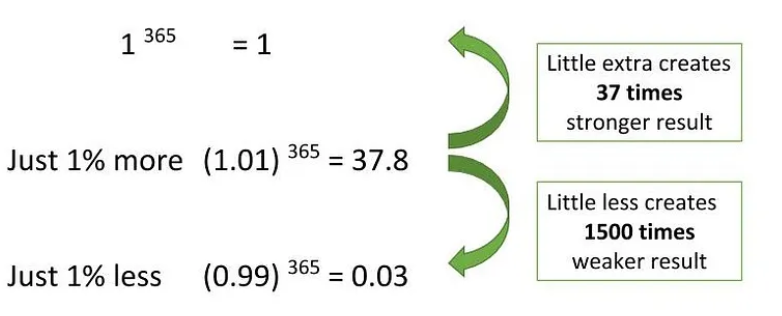

## 5.Playground

### Guidelines

For every concept presetned above, there's a similar that awaits for your code input.
1. Go to https://thessaloniki2.aiandbeers.gr/
1. Click Enroll and register
1. Click the the **Steps** section and submit your results for the corresponding question

### Questions
Follow the description, fill in the missing code when necessary and submit the answer of each question in the [aiandbeers website](https://thessaloniki2.aiandbeers.gr/)

Q1: 3.1 Usage of CTEs (Common Table Expressions)</br>
Q2: 3.2 Usage of Reporting Period - Reporting Date concept</br>
Q3: 3.3 Hierarchical data and queries with Recursive CTE</br>
Q4: 3.4`lag` & `lead` window functions</br>
Q5: 3.5 `except` & `intersect` functions</br>
Q6: 4.1 Pandas `merge_asof()` function</br>
Q7: 4.2 Create any function and iterate in dataframe using `apply()`</br>
Q8: 4.3 Get previous end of month column value</br>
Q9: 4.4 Use `resample()` & `ffill()`</br>
Q10: 4.5 Code by importing modules and functions in a notebook</br>


#### Q1

Fix the error below in order the CTEs to run. </br>
We are creating a query which ranks seller cities per customer city based on sales and filter out the seller cities in which customer_city = 'cabo frio' is ranked 3rd.</br>
How many rows does the resulting dataframe returns?

<font size="5">Running all cells should stop here due to missing code below!</font>

In [ ]:
# Create a query which ranks customer cities per seller city based on sales
# and filter out the top 3rd customer city for customer_city = 'cabo frio'

q1_query = """
with sellers_cte as (
  select
    seller_id
    , seller_city
  from sellers
)

, order_items_cte as (
  select
    order_id
    , order_item_id
    , seller_id
    , price
  from order_items
  where price > 30
)

, avg_price_for_order_items_cte as (
  select
    avg(price) as avg_price_total
  from order_items_cte
)

, orders_cte as (
  select
    order_id
    , customer_id
  from orders
  where order_status = 'delivered'
)

----------YOUR CODE GOES BELOW THIS LINE----------

customers_cte as (
  select
    customer_id
    , customer_city
  from customers
)

----------YOUR CODE GOES ABOVE THIS LINE----------

, aggregated_data as (
  select
    customers_cte.customer_city
    , sellers_cte.seller_city
    , count(*) as sales
    , avg(order_items_cte.price) as avg_price_per_city_combo
  from order_items_cte
  left join sellers_cte
  on order_items_cte.seller_id = sellers_cte.seller_id
  left join orders_cte
  on order_items_cte.order_id = orders_cte.order_id
  left join customers_cte
  on orders_cte.customer_id = customers_cte.customer_id
  group by 1,2
)

, rank_cte as (
  select
    aggregated_data.customer_city
    , aggregated_data.seller_city
    , avg_price_per_city_combo
    , dense_rank() over (partition by seller_city order by sales desc) as rank_of_sales
  from aggregated_data
)

select *
from rank_cte
cross join avg_price_for_order_items_cte
where customer_city = 'cabo frio' and rank_of_sales = 3
and avg_price_per_city_combo >= 100
"""

# Execute SQL queries and store results in DataFrames
q1 = execute_sql_query(q1_query)
q1

#### Q2
Fill in the missing code below in order to create and insert rows to a new table `reporting_periods_table_question`. This new table should now include a new reporting period in an **decade level**. </br> What's the number of rows for the newly created table?

In [ ]:
# SQL queries
drop_table_reporting_periods_table_question_query = """
    DROP TABLE IF EXISTS reporting_periods_table_question
"""

create_table_reporting_periods_table_question_query = """
    CREATE TABLE IF NOT EXISTS reporting_periods_table_question (
    reporting_period TEXT,
    reporting_date DATE,
    is_end_of_month BOOLEAN
    )
 """

insert_into_reporting_periods_table_question_query = """
    insert into reporting_periods_table_question (reporting_period, reporting_date, is_end_of_month)
    with processed_dates as (
        select
          'Day' as reporting_period
          , date(date_trunc('day',date_column)) reporting_date
          , (EXTRACT(DAY FROM (date_trunc('day', date_column) + INTERVAL '1 day')) = 1) AS is_end_of_month
        from all_dates
        union
        select
          'Week' as reporting_period
          , date(date_trunc('Week',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
        union
        select
          'Month' as reporting_period
          , date(date_trunc('Month',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
        union
        select
          'Quarter' as reporting_period
          , date(date_trunc('Quarter',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates
        union
        select
          'Year' as reporting_period
          , date(date_trunc('Year',date_column)) reporting_date
          , null as is_end_of_month
        from all_dates

----------YOUR CODE GOES BELOW THIS LINE----------


----------YOUR CODE GOES ABOVE THIS LINE----------

    )
    select *
    from processed_dates
"""

try:
    # Step 1: Drop table if exists
    cur.execute(drop_table_reporting_periods_table_question_query)

    # Step 2: Create a table if it doesn't exist
    cur.execute(create_table_reporting_periods_table_question_query)

    # Step 3: Execute the SQL query to insert data into the table
    cur.execute(insert_into_reporting_periods_table_question_query)

    # Commit the changes to the database
    conn.commit()
    print("Created table 'reporting_periods_table_question' and inserted data successfully.")

except psycopg2.Error as e:
    conn.rollback()
    print("Error:", e)

q2_query = """ select * from reporting_periods_table_question """
q2 = execute_sql_query(q2_query)
len(q2)

#### Q3
Fix the error below in order the recursive CTE to run. </br>How many rows does the resulting dataframe returns?

In [ ]:
update_table_employees_query = """
UPDATE employees
SET manager_id = 101
WHERE manager_id = 102;
"""

try:
    # Step 1: Drop table if exists
    cur.execute(update_table_employees_query)
    conn.commit()
except psycopg2.Error as e:
    conn.rollback()
    print("Error:", e)

# Create the path column which stores the full hierarchical path per employee
q3_query = """
with recursive employee_hierarchies AS (
  select
    employee_id
    , first_name
    , last_name
    , manager_id
    , 'CEO' AS path
  from employees
  where manager_id is null

  union all

  select
    emp.employee_id
    , emp.first_name
    , emp.last_name
    , emp.manager_id
    , employee_hierarchies.path || '->' || emp.last_name

----------YOUR CODE GOES BELOW THIS LINE----------


----------YOUR CODE GOES ABOVE THIS LINE----------

)

select *
from employee_hierarchies
where path like '%Kochhar->%'
"""
q3 = execute_sql_query(q3_query)
len(q3)

#### Q4
Fill in the missing code below using `lead/lag` functions to obtain the 3rd next `order_id` for the same payment_installments for </br>`order_id = '5cb8558cbb7c0c2f00f43468579d3e3c'`.

In [ ]:
q4_query = """
with order_payments_cte as (
select
  order_id
  , payment_type
  , payment_value
  , payment_installments
from order_payments
)

, orders_cte as (
  select
    order_id
    ,date(order_approved_at) as order_approved_at_date
  from orders
)

, order_payments_full_data as (
  select
    order_payments_cte.order_id
    , order_payments_cte.payment_type
    , order_payments_cte.payment_value
    , order_payments_cte.payment_installments
    , orders_cte.order_approved_at_date
  from order_payments_cte
  left join orders_cte
  on order_payments_cte.order_id = orders_cte.order_id
)

, aggregated_data as (select
    order_id
    , payment_type
    , payment_value
    , payment_installments
    , order_approved_at_date

----------YOUR CODE GOES BELOW THIS LINE----------

----------YOUR CODE GOES ABOVE THIS LINE----------

from order_payments_full_data
)

select
  previous_order_id_in_same_payment_type
from aggregated_data
where order_id = '5cb8558cbb7c0c2f00f43468579d3e3c'
"""
q4 = execute_sql_query(q4_query)
q4

#### Q5
Fill in the missing code below using `intersect/except` functions to obtain the number of records that exist in `all_dates` table and not in `all_dates_v3`. The output of the code `len(q5)` returns the desired number of records.

In [ ]:
# We'll create a new version (v3) of the the table all_dates.

drop_table_all_dates_v3_query = """
DROP TABLE IF EXISTS all_dates_v3
"""

create_table_all_dates_v3_query = """
CREATE TABLE IF NOT EXISTS all_dates_v3 (
date_column DATE
)
"""

insert_into_all_dates_v3_query = """
insert into all_dates_v3 (date_column)
select generate_series('2015-01-01'::date, '2018-11-05'::date, '1 day'::interval) AS date_column
"""

try:
    # Step 1: Drop table if exists
    cur.execute(drop_table_all_dates_v3_query)

    # Step 2: Create a table to store the dates
    cur.execute(create_table_all_dates_v3_query)

    # Step 3: Insert all dates from the first day of 2015 up to the last day of 2024
    cur.execute(insert_into_all_dates_v3_query)

    # Commit the changes to the database
    conn.commit()
    print("Created table 'all_dates_v3' and inserted data successfully.")

except psycopg2.Error as e:
    conn.rollback()
    print("Error:", e)

In [ ]:
q5_query = """
select
  date_column
----------YOUR CODE GOES BELOW THIS LINE----------


----------YOUR CODE GOES ABOVE THIS LINE----------

select
  date_column

----------YOUR CODE GOES BELOW THIS LINE----------

----------YOUR CODE GOES ABOVE THIS LINE----------
"""
q5 = execute_sql_query(q5_query)
len(q5)

#### Q6
Fill in the missing code below using `merge_asof()` and all the necessary configuration of this function to obtain the **next** `order_id` from gift card's date for `customer_id = '6b17845b9378ecf3d2c326579c38b24a'`.

In [ ]:
customers_dataframe = o_list_order_customer_merged
customers_dataframe.loc[customers_dataframe['customer_id'] == '6b17845b9378ecf3d2c326579c38b24a', 'gift_card_created_at'] = pd.to_datetime('2016-01-01 00:13:40', format="%Y-%m-%d %H:%M:%S")
# Performing merge_asof after sorting dfs
# Sort both DataFrames by the column used for merging date fields
customers_dataframe = customers_dataframe.sort_values(by=['gift_card_created_at'])
o_list_orders = o_list_orders.sort_values(by=['order_date'])
#----------YOUR CODE GOES BELOW THIS LINE----------
merge_asof_forward =
#----------YOUR CODE GOES ABOVE THIS LINE----------
merge_asof_forward[merge_asof_forward['customer_id'] == '6b17845b9378ecf3d2c326579c38b24a']

#### Q7
The `q7_function` below created bins for the column `freight_value` for the `o_list_order_items` dataframe.</br>
Fill in the missing code below using the already filled `q7_function` and `apply()` along with all the necessary configuration of this function to obtain the number of records that the dataframe `q7` returns.

In [ ]:
def q7_function(row):
  if row['freight_value'] <= 20:
    return '[0-20]'
  elif (row['freight_value']>20) & (row['freight_value']<=100):
    return '[0-20]'
  else:
    return '>100'

q7 = o_list_order_items

#----------YOUR CODE GOES BELOW THIS LINE----------
q7['freight_bin'] = q7.
#----------YOUR CODE GOES ABOVE THIS LINE----------

len(q7[q7['freight_bin'] == '[0-20]'])

#### Q8
Fill in the missing code below using `transform()` and `shift()` along with all the necessary configuration of this functions to obtain the x2 previous `order_status` that line 7 `q8['status_q8'][q8['order_date'] == q8['order_date'].max()]` returns. The answer for this question is the text value of column `status_q8`.

In [ ]:
#Get previous month label
q8 = o_list_orders_v2_last_day_of_month[o_list_orders_v2_last_day_of_month['customer_id']=='00012a2ce6f8dcda20d059ce98491703']
q8 = q8.sort_values(['customer_id','order_date'])

#----------YOUR CODE GOES BELOW THIS LINE----------
q8['status_q8'] = q8.
#----------YOUR CODE GOES ABOVE THIS LINE----------

q8['status_q8'][q8['order_date'] == q8['order_date'].max()]

#### Q9

Fill in the missing code below using `resample()` and `ffill()` along with all the necessary configuration of this functions to resample the data in a yearly level and ffill the the values. </br>
How many records/order_ids of the resulting dataframe DO NOT have a 3-digit `order_id`?

In [ ]:
#Concatenate the main dataframe with the customer_ids and current date
q9_concatenated = pd.concat([o_list_orders_v2_last_day_of_month_example, customers_ids])
q9_concatenated

In [ ]:
# q9_concatenated = pd.concat([o_list_orders_v2_last_day_of_month_example, customers_ids])
# Uncomment above line of code to run again the code

q9_concatenated.set_index('order_date', inplace=True)
#----------YOUR CODE GOES BELOW THIS LINE----------
q9_concatenated = q9_concatenated.
#----------YOUR CODE GOES ABOVE THIS LINE----------
q9_concatenated = q9_concatenated.reset_index()
q9_concatenated

#### Q10
Visit the [notebook](https://github.com/jxareas/Machine-Learning-Notebooks/blob/master/1_Supervised_Machine_Learning/Week%201.%20Introduction%20to%20Machine%20Learning/C1_W1_Lab05_Gradient_Descent_Soln.ipynb) of 4.5 and the [script](https://github.com/jxareas/Machine-Learning-Notebooks/blob/master/1_Supervised_Machine_Learning/Week%201.%20Introduction%20to%20Machine%20Learning/lab_utils_uni.py) that is being imported.

- Q10.1 How many rows of code does the script includes?</br>
- Q10.2 What's the entire line of code that script is beeing imported? The answer is the entire line of code.</br>

<font size="5">Thanks for participating!</font>

## Useful Links
1. [Google Collab Shortcuts](https://colab.research.google.com/drive/13IO3-gfyS9mSPuzAo6-wsYBUOVpxb_va?usp=sharing#scrollTo=JvHqpL94zh_7) </br>
1. [Hierarchical Data and How to Query It in SQL](https://learnsql.com/blog/how-to-query-hierarchical-data/) </br>
1. [Kaggle Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_geolocation_dataset.csv) & [employees Dataset](https://gist.github.com/kevin336/acbb2271e66c10a5b73aacf82ca82784)
1. [The 1% Principle…](https://the3fs.medium.com/the-1-principle-998b33512100)
1. [PostgreSQL LEAD/LAG Function](https://www.postgresqltutorial.com/postgresql-window-function/postgresql-lead-function/)
1. [SQL | Intersect & Except clause](https://www.geeksforgeeks.org/sql-intersect-except-clause/)
1. [pandas.merge_asof](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.merge_asof.html#pandas.merge_asof)
1. [pandas.DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
1. [How to Use Python Lambda Functions](https://realpython.com/python-lambda/)
1. [pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html)
1. [pandas.DataFrame.transform](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)
1. [pandas.DataFrame.shift](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)
1. [pandas.DataFrame.last](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.last.html)
1. [pandas.DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)
1. [pandas.DataFrame.ffill](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html)
1. [Repo for concept 4.5](https://github.com/jxareas/Machine-Learning-Notebooks/tree/master/1_Supervised_Machine_Learning/Week%201.%20Introduction%20to%20Machine%20Learning)